Populating the interactive namespace from numpy and matplotlib


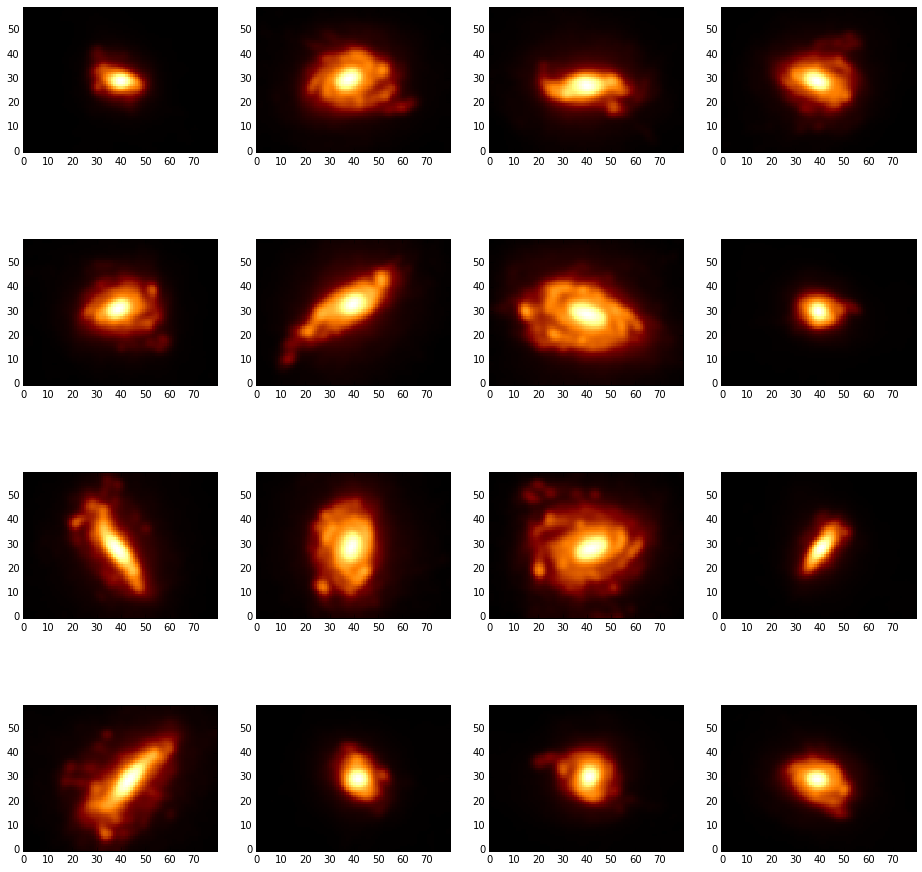

In [1]:
%pylab inline

import numpy
import astrohack_projections
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = 16, 16
plot_kwargs = {"interpolation": "nearest",
          "cmap": "afmhot",
          "origin": "lower"}

file_path = "/Users/dalyabaron/Downloads/cutout_242959.hdf5"
illustris_gal = astrohack_projections.illustris_model_and_image(file_path)
illustris_gal.set_image_shape((60, 80))

for i in xrange(16):
    xi_hat, eta_hat = astrohack_projections.choose_random_projection()
    alpha, beta, gamma = numpy.random.uniform(0.0, 360.0, 3)
    intensity = 1.5
    scale = 0.015 * numpy.exp(numpy.random.uniform())
    xshift = numpy.random.uniform(29., 31.)
    yshift = numpy.random.uniform(39., 41.)
    psf_size = 1.5
    bg = 0.
    
    kwargs = {'alpha':alpha, 'beta':beta, 'gamma':gamma, 'intensity':intensity, 'scale':scale, 'xshift': xshift, 'yshift': yshift, 'bg':0.0, 'psf_size':psf_size}
    illustris_gal.set_image_parameters(**kwargs)
    illustris_gal.construct_image()
    
    plt.subplot(4, 4, i+1)
    a, mid = numpy.percentile(illustris_gal.get_image(), [15., 85.])
    ran = mid - a
    vmin = mid - 5. * ran
    vmax = mid + 20. * ran
    plt.imshow(numpy.log10(illustris_gal.get_image()+1), **plot_kwargs)

In [2]:
# create an album of 32 such objects with random projection + normaly distributed noise

# plot parameters
plt.rcParams['figure.figsize'] = 16, 16
plot_kwargs = {"interpolation": "nearest",
          "cmap": "afmhot",
          "origin": "lower"}

# initial galaxy data
file_path = "/Users/dalyabaron/Downloads/cutout_242959.hdf5"
illustris_gal = astrohack_projections.illustris_model_and_image(file_path)
illustris_gal.set_image_shape((60, 80))

# album and PSF initialisation
album = astrohack_projections.album_and_model()
psf = astrohack_projections.mixture_of_gaussians(2)
psf.add_gaussian(1., numpy.array([0., 0.]), numpy.eye(2)*1.)

# galaxy model I fit with
basevar = 0.5 * numpy.eye(3)
gal_model = astrohack_projections.galaxy_model_3d()
v = [3., 0., 0.]
gal_model.add_gaussian(1.0, numpy.array([0., -1., 0.]), basevar + numpy.outer(v,v))
v = [-1., 3., 0.]
gal_model.add_gaussian(1.0, numpy.array([2., 1., 0.]), basevar + numpy.outer(v,v))
v = [1., 3., 0.]
gal_model.add_gaussian(1.0, numpy.array([-2., 1., 0.]), basevar + numpy.outer(v,v))

for i in xrange(32):
    # projection parameters
    xi_hat, eta_hat = astrohack_projections.choose_random_projection()
    alpha, beta, gamma = numpy.random.uniform(0.0, 360.0, 3)
    intensity = 20
    scale = 0.015 * numpy.exp(numpy.random.uniform())
    xshift = numpy.random.uniform(29.5, 31.)
    yshift = numpy.random.uniform(39.5, 41.)
    psf_size = 1.5
    bg = 0.
    # illustris galaxy
    kwargs = {'alpha':alpha, 'beta':beta, 'gamma':gamma, 'intensity':intensity, 'scale':scale, 'xshift': xshift, 'yshift': yshift, 'bg':0.0, 'psf_size':psf_size}
    illustris_gal.set_image_parameters(**kwargs)
    illustris_gal.construct_image(xi_hat, eta_hat)
    # image
    image = astrohack_projections.image_and_model()
    image.set_shape((60, 80))
    image.set_psf(psf)
    kwargs = {'alpha':alpha, 'beta':beta, 'gamma':gamma, 'intensity':intensity, 'scale':scale, 'xshift': xshift, 'yshift': yshift, 'bg':0.0}
    image.set_parameters(**kwargs)
    image.set_galaxy(gal_model)
    image.set_ivar(numpy.ones(image.get_shape()))
    image.set_data(illustris_gal.get_image() + numpy.random.normal(size=image.get_shape())/ numpy.sqrt(image.ivar))
    # album
    album.add_image(image)
    
print len(album)

32


astrohack_projections.py:519: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if xi_hat == None and eta_hat == None:


/Users/dalyabaron/.virtualenvs/astro/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in sqrt


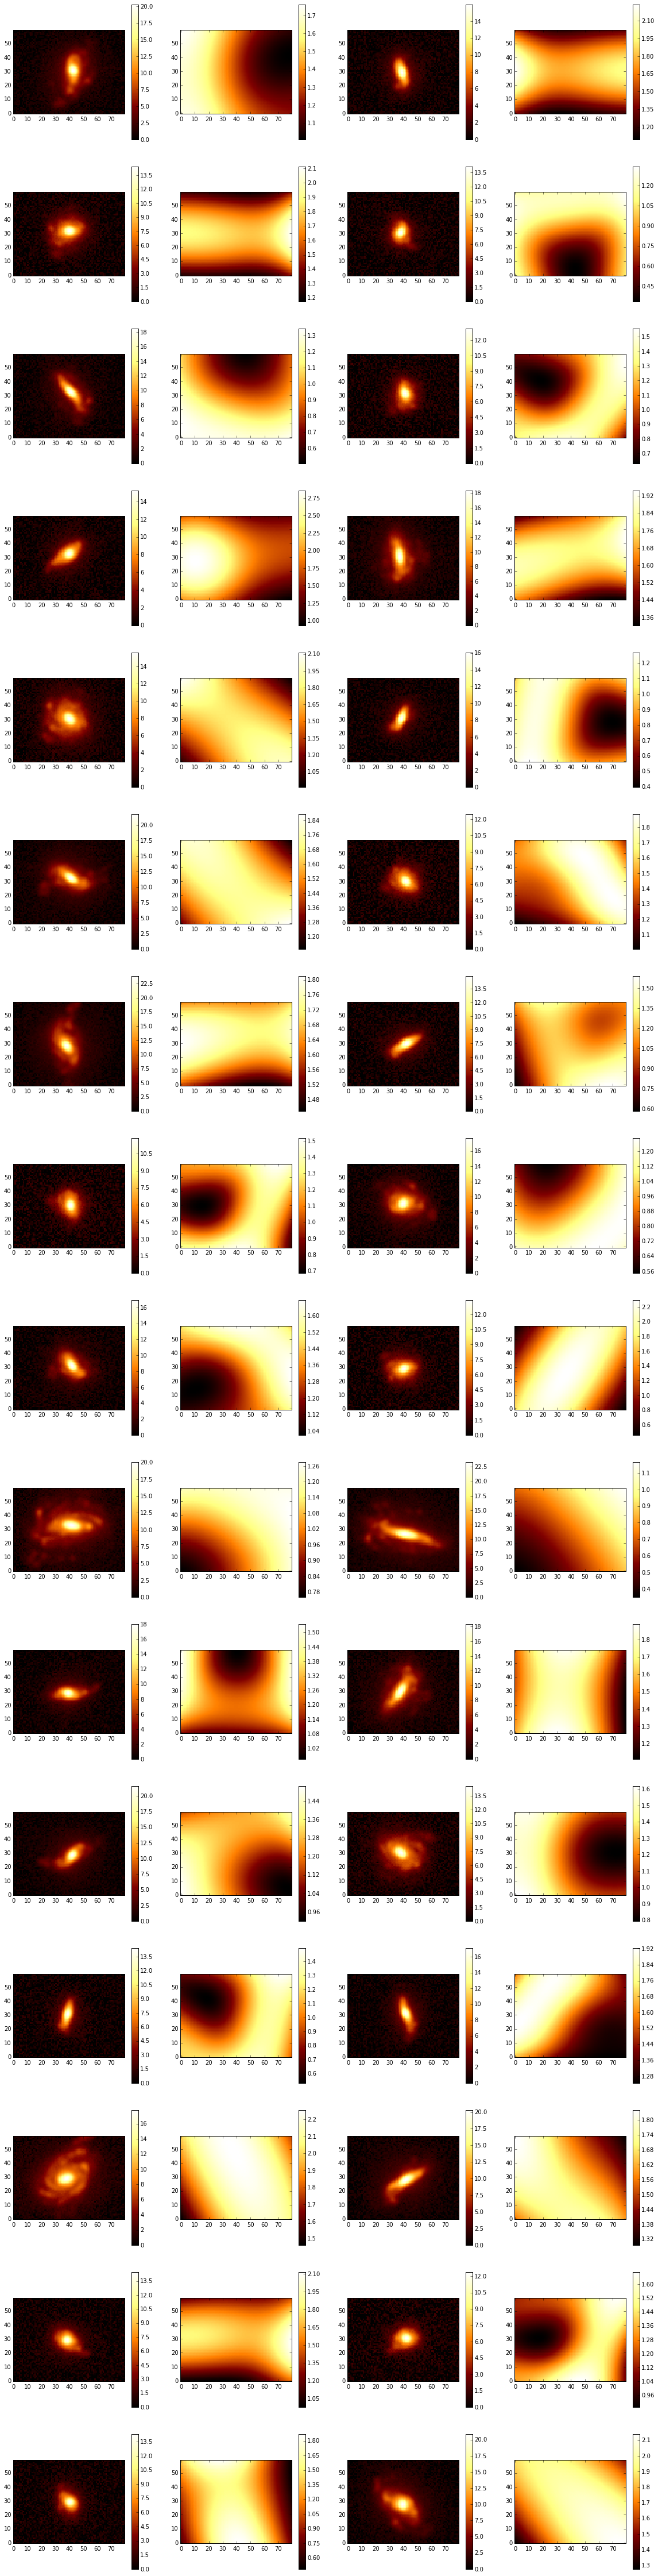

In [3]:
def showme(album):
    plt.rcParams['figure.figsize'] = 20, 80
    plot_kwargs = {"interpolation": "nearest",
          "cmap": "afmhot",
          "origin": "lower"}
    for i in xrange(len(album)):
        image = album.get_all_images()[i]
        plt.subplot(16, 4, 2*i+1)
        vmin = -5. / numpy.sqrt(numpy.median(image.get_ivar())) # assumes bg = 0
        vmax = -2. * vmin # assumes bg = 0
        plt.imshow(numpy.nan_to_num(numpy.sqrt(image.get_data())), **plot_kwargs)
        plt.colorbar()
        plt.subplot(16, 4, 2*i+2)
        plt.imshow(numpy.nan_to_num(numpy.sqrt(image.get_synthetic())), **plot_kwargs)
        plt.colorbar()
        
showme(album)

{'beta': 51.232167005586263, 'scale': 1, 'bg': 0.0, 'yshift': 40.66364170432902, 'xshift': 30.23967726027996, 'alpha': 33.039304262559206, 'intensity': 20, 'gamma': 332.08766647984862}
{'beta': 269.05760249898043, 'scale': 1, 'bg': 0.0, 'yshift': 40.46434716815094, 'xshift': 29.681506938355994, 'alpha': 359.42251541683532, 'intensity': 20, 'gamma': 100.77772523808864}
{'beta': 86.960304795069732, 'scale': 1, 'bg': 0.0, 'yshift': 39.99934302872261, 'xshift': 30.608077992663574, 'alpha': 204.72091887562951, 'intensity': 20, 'gamma': 87.083274111293775}
{'beta': 170.79102864186979, 'scale': 1, 'bg': 0.0, 'yshift': 39.686318841503606, 'xshift': 30.507207091277987, 'alpha': 350.4932301653065, 'intensity': 20, 'gamma': 279.06206536226483}
{'beta': 2.9942822562065174, 'scale': 1, 'bg': 0.0, 'yshift': 40.0900289145379, 'xshift': 30.49398327358088, 'alpha': 213.9066337655353, 'intensity': 20, 'gamma': 253.83891976087781}
{'beta': 136.82866879971652, 'scale': 1, 'bg': 0.0, 'yshift': 40.191561849

/Users/dalyabaron/.virtualenvs/astro/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in sqrt


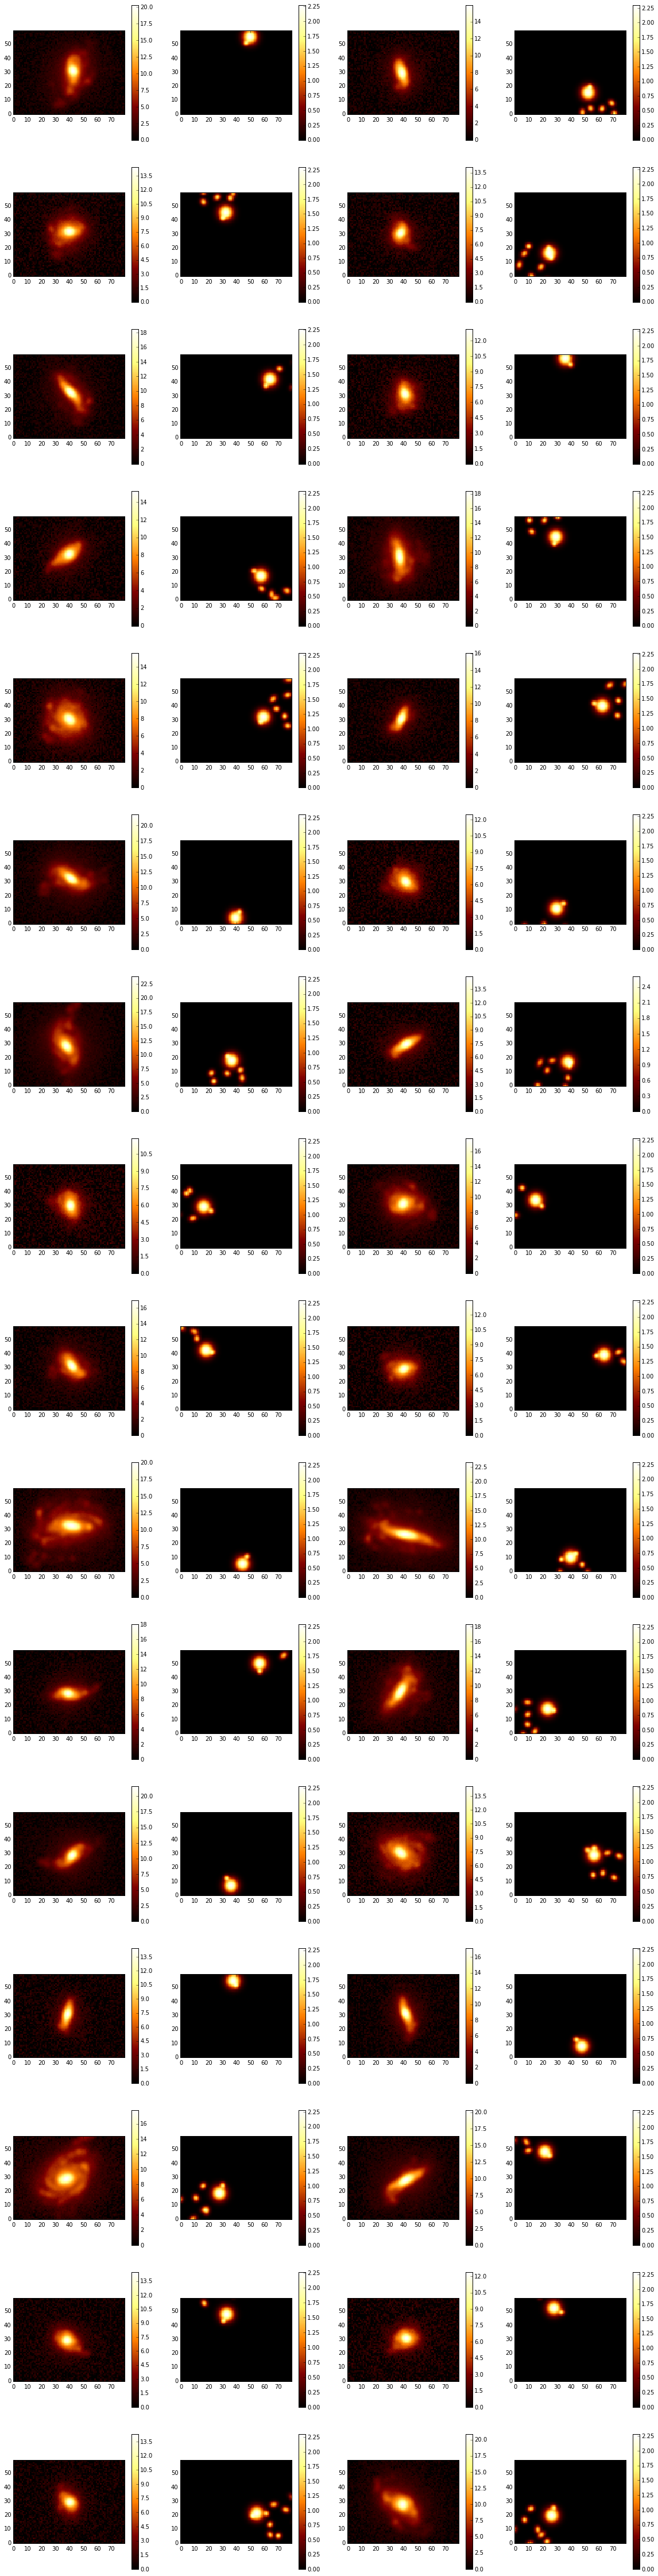

In [7]:
basevar = 0.1 * numpy.eye(3)
gal_model = astrohack_projections.galaxy_model_3d()
num_of_gaussians = 10

for i in xrange(num_of_gaussians - 1):
    mu = numpy.random.uniform(10, 50, size=3)
    v = numpy.random.uniform(-1, 1, size=3)
    fi = basevar + numpy.outer(v, v)
    gal_model.add_gaussian(1.0, mu, fi)
    
gal_model.add_gaussian(10.0, numpy.array((15, 15, 15)), 5*numpy.eye(3))

# album and PSF initialisation
album_new = astrohack_projections.album_and_model()
psf = astrohack_projections.mixture_of_gaussians(2)
psf.add_gaussian(1., numpy.array([0., 0.]), numpy.eye(2)*1.)

for i in xrange(32):
    image = album.get_all_images()[i]
    data = image.get_data()
    parameters = image.get_parameters()
    print parameters
    # image
    image = astrohack_projections.image_and_model()
    image.set_shape((60, 80))
    image.set_psf(psf)
    parameters['scale'] = 1
    image.set_parameters(**parameters)
    image.set_galaxy(gal_model)
    image.set_ivar(numpy.ones(image.get_shape()))
    image.set_data(data)
    # album
    album_new.add_image(image)
    
showme(album_new)
album_new.set_galaxy(gal_model)
plt.savefig("./fitting_pngs/illustris_242959_complex2/initialisation.pdf")

In [8]:
# run the thing!
import scipy.optimize as op
num_runs = 20

for i in xrange(num_runs):
    # album optimisation
    galpar0 = album_new.galaxy.get_parameters_vector()
    print "album before", album_new(galpar0)
    result = op.minimize(album_new, galpar0, method="Powell")
    galpar = result['x']
    print "album after", album_new(galpar)
    
    showme(album_new)
    plt.savefig("./fitting_pngs/illustris_242959_complex2/run_%s_album.pdf" % str(2*i).zfill(2))
    plt.close()
    
    
    # image optimisation
    for image in album_new:
        imgpar0 = image.get_parameters_vector()
        print "image before", image(imgpar0)
        result = op.minimize(image, imgpar0)
        imgpar = result['x']
        print "image after", image(imgpar)

    showme(album_new)
    plt.savefig("./fitting_pngs/illustris_242959_complex2/run_%s_image.pdf" % str(2*i+1).zfill(2))
    plt.close()

album before 

/Users/dalyabaron/.virtualenvs/astro/lib/python2.7/site-packages/scipy/optimize/optimize.py:1778: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/dalyabaron/.virtualenvs/astro/lib/python2.7/site-packages/scipy/optimize/optimize.py:1779: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
/Users/dalyabaron/.virtualenvs/astro/lib/python2.7/site-packages/scipy/optimize/optimize.py:1780: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = 2.0 * (tmp2 - tmp1)
/Users/dalyabaron/.virtualenvs/astro/lib/python2.7/site-packages/scipy/optimize/optimize.py:2108: RuntimeWarning: invalid value encountered in double_scalars
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom


100411489.045
album after

/Users/dalyabaron/.virtualenvs/astro/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in sqrt
/Users/dalyabaron/.virtualenvs/astro/lib/python2.7/site-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in sqrt


 37551634.7708
image before 1052671.65991
image after 301055.049093
image before 822963.933859
image after 139951.473749
image before 322565.585649
image after 53592.4953705
image before 396508.366003
image after 49904.6714683
image before 932952.885243
image after 288927.083343
image before 462010.099091
image after 26918.984334
image before 367036.207467
image after 72126.2643836
image before 1144967.11349
image after 212402.695513
image before 255226.230246
image after 94434.50241
image before 681772.060551
image after 92051.1117435
image before 1858087.48226
image after 520597.972236
image before 495690.894023
image after 29826.8412187
image before 2772250.68321
image after 404447.538866
image before 556916.081006
image after 125321.485364
image before 456844.922017
image after 24939.1951661
image before 569242.851459
image after 106378.997055
image before 470208.915596
image after 178298.526019
image before 510189.822824
image after 31100.6384985
image before 2744298.95668
image a

/Users/dalyabaron/.virtualenvs/astro/lib/python2.7/site-packages/scipy/optimize/optimize.py:891: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


KeyboardInterrupt: 